In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
from langchain.embeddings import HuggingFaceEmbeddings
from sklearn.metrics.pairwise import cosine_similarity

embeddings = HuggingFaceEmbeddings(
    model_name="sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2"
)

/Users/nguyenvanquanghung/anaconda3/envs/min_ds-env/lib/python3.10/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


## 1. Đánh giá độ tương đồng của các câu trả lời từ iLaw và chuyên gia từ Thư Viện Pháp Luật

In [50]:
df = pd.read_csv("model_answer_comparison.csv")

In [51]:
df

,link,label,date,title,question,content,answer,gpt_non_kb,gemini_non_kb
0,https://thuvienphapluat.vn/hoi-dap-phap-luat/8...,Nhãn hiệu,23:00 | 27/11/2024,"Theo Luật Sở hữu trí tuệ Việt Nam, nhãn hiệu c...","Theo Luật Sở hữu trí tuệ Việt Nam, nhãn hiệu c...",Căn cứ khoản 6 Điều 93Luật Sở hữu trí tuệ 2005...,"Theo Luật Sở hữu trí tuệ Việt Nam, thời gian b...",1. **Xác định câu hỏi của người dùng**: Người ...,"Chào bạn, tôi là iLaw, luật sư chuyên về sở hữ..."
1,https://thuvienphapluat.vn/hoi-dap-phap-luat/8...,Nhãn hiệu,23:00 | 27/11/2024,"Theo Luật Sở hữu trí tuệ Việt Nam, nhãn hiệu c...",Thủ tục gia hạn Giấy chứng nhận đăng ký nhãn h...,Theo Điều 31Nghị định 65/2023/NĐ-CPquy định th...,Thủ tục gia hạn Giấy chứng nhận đăng ký nhãn h...,Để gia hạn Giấy chứng nhận đăng ký nhãn hiệu t...,"Chào bạn, tôi là iLaw, luật sư chuyên về sở hữ..."
2,https://thuvienphapluat.vn/hoi-dap-phap-luat/8...,Nhãn hiệu,23:00 | 27/11/2024,"Theo Luật Sở hữu trí tuệ Việt Nam, nhãn hiệu c...",Tải Mẫu Tờ khai yêu cầu gia hạn hiệu lực Giấy ...,Mẫu Tờ khai yêu cầu gia hạn hiệu lực Giấy chứn...,Để tải mẫu tờ khai yêu cầu gia hạn hiệu lực Gi...,1. **Xác định câu hỏi của người dùng**: Người ...,"Chào bạn,\n\nTôi là iLaw, luật sư chuyên về sở..."
3,https://thuvienphapluat.vn/hoi-dap-phap-luat/8...,Quyền sở hữu công nghiệp,21:00 | 27/11/2024,Quyền sở hữu công nghiệp gồm các quyền nào?,Quyền sở hữu công nghiệp gồm các quyền nào?,Căn cứ khoản 4 Điều 4Luật Sở hữu trí tuệ 2005đ...,Quyền sở hữu công nghiệp là một phần quan trọn...,1. **Xác định câu hỏi của người dùng**: Người ...,"Chào bạn, tôi là iLaw, luật sư chuyên về sở hữ..."
4,https://thuvienphapluat.vn/hoi-dap-phap-luat/8...,Quyền sở hữu công nghiệp,21:00 | 27/11/2024,Quyền sở hữu công nghiệp gồm các quyền nào?,Quyền sở hữu công nghiệp được xác lập như thế ...,Theo khoản 3 Điều 6Luật Sở hữu trí tuệ 2005đượ...,Quyền sở hữu công nghiệp tại Việt Nam được xác...,1. **Xác định câu hỏi của người dùng**: Người ...,"Chào bạn, tôi là iLaw, luật sư chuyên về sở hữ..."
...,...,...,...,...,...,...,...,...,...
395,https://thuvienphapluat.vn/hoi-dap-phap-luat/8...,Nhãn hàng hóa,21:10 | 25/10/2023,Bao bì thương phẩm là gì? Bao bì dùng để đựng ...,Bao bì dùng để đựng hàng hóa bán lẻ có được xe...,Căn cứ quy định Điều 3Thông tư 05/2019/TT-BKHC...,Để trả lời câu hỏi của bạn về việc bao bì dùng...,Bao bì dùng để đựng hàng hóa bán lẻ có thể đượ...,"Chào bạn, tôi là iLaw, luật sư chuyên về sở hữ..."
396,https://thuvienphapluat.vn/hoi-dap-phap-luat/8...,Nhãn hàng hóa,21:10 | 25/10/2023,Bao bì thương phẩm là gì? Bao bì dùng để đựng ...,Vị trí nhãn hàng hóa đối với hàng hóa có cả ba...,Căn cứ quy định khoản 2 Điều 4Thông tư 05/2019...,"Theo pháp luật Việt Nam, vị trí nhãn hàng hóa ...",Vị trí nhãn hàng hóa đối với hàng hóa có cả ba...,"Chào bạn, tôi là iLaw, luật sư chuyên về sở hữ..."
397,https://thuvienphapluat.vn/hoi-dap-phap-luat/8...,Dịch vụ đánh giá công nghệ,09:00 | 25/10/2023,Mẫu Giấy chứng nhận đủ điều kiện hoạt động dịc...,Mẫu Giấy chứng nhận đủ điều kiện hoạt động dịc...,Dưới đây là mẫu Giấy chứng nhận đủ điều kiện h...,Chúng tôi không tìm thấy thông tin liên quan.,Chúng tôi không tìm thấy thông tin liên quan.,"Chào bạn,\n\nTôi là iLaw, luật sư chuyên về sở..."
398,https://thuvienphapluat.vn/hoi-dap-phap-luat/8...,Dịch vụ đánh giá công nghệ,09:00 | 25/10/2023,Mẫu Giấy chứng nhận đủ điều kiện hoạt động dịc...,Trình tự cấp Giấy chứng nhận đủ điều kiện hoạt...,Căn cứ quy định Điều 34Nghị định 76/2018/NĐ-CP...,Chúng tôi không tìm thấy thông tin liên quan.,Chúng tôi không tìm thấy thông tin liên quan.,"Chào bạn, tôi là iLaw, luật sư chuyên về sở hữ..."


In [52]:
len(df[df["answer"] == "Chúng tôi không tìm thấy thông tin liên quan."])

43

In [53]:
def calculate_similarity(row, col1, col2):
    if row[col2] == "Chúng tôi không tìm thấy thông tin liên quan." or pd.isnull(row[col2]):
        return 0
    else:
        return cosine_similarity(
            [embeddings.embed_query(row[col1])],
            [embeddings.embed_query(row[col2])]
        )[0][0]

# Sử dụng lambda để truyền thêm tham số col1 và col2
df["similarity"] = df.apply(lambda row: calculate_similarity(row, col1="content", col2="answer"), axis=1)

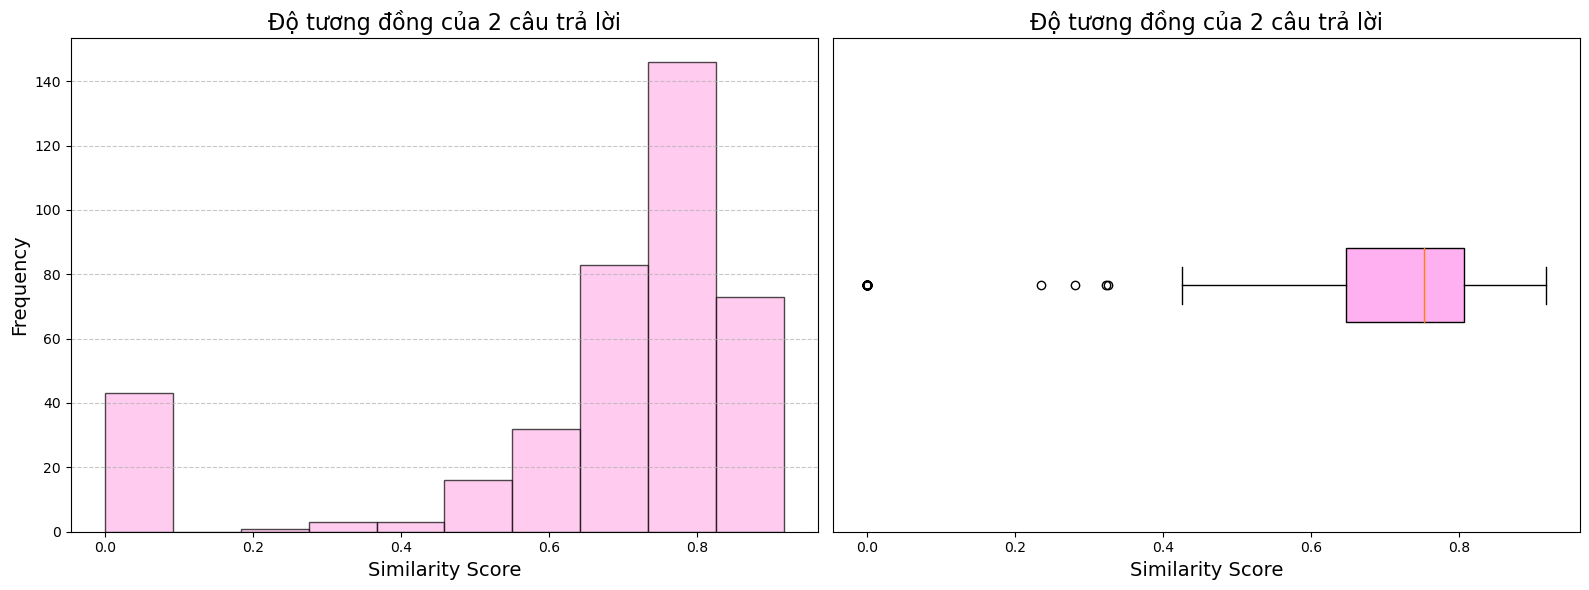

In [54]:
# Tạo bảng màu pastel
pastel_colors = [to_rgba(c, alpha=0.8) for c in ['#FFB5E8', '#FF9CEE', '#FFCCF9', '#FCC2FF', '#F5A9B8', '#FFC5A1']]

def plot_cosine_similarity(df, sim_col, num_color=0):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Histogram
    axes[0].hist(
        df[sim_col], 
        bins=10, 
        color=pastel_colors[num_color],  
        edgecolor='black', 
        alpha=0.7
    )
    axes[0].set_title('Độ tương đồng của 2 câu trả lời', fontsize=16)
    axes[0].set_xlabel('Similarity Score', fontsize=14)
    axes[0].set_ylabel('Frequency', fontsize=14)
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)

    # Box plot
    axes[1].boxplot(
        df[sim_col], 
        vert=False, 
        patch_artist=True, 
        boxprops=dict(facecolor=pastel_colors[1])  
    )
    axes[1].set_title('Độ tương đồng của 2 câu trả lời', fontsize=16)
    axes[1].set_xlabel('Similarity Score', fontsize=14)
    axes[1].set_yticks([])

    # Áp dụng layout
    plt.tight_layout()
    plt.show()


plot_cosine_similarity(df, 'similarity')


## So sánh câu trả lời giữa chuyên gia với với GPT mà không cung cấp knowledge base

In [55]:
# Sử dụng lambda để truyền thêm tham số col1 và col2
df["similarity_gpt_non_kb"] = df.apply(lambda row: calculate_similarity(row, col1="content", col2="gpt_non_kb"), axis=1)

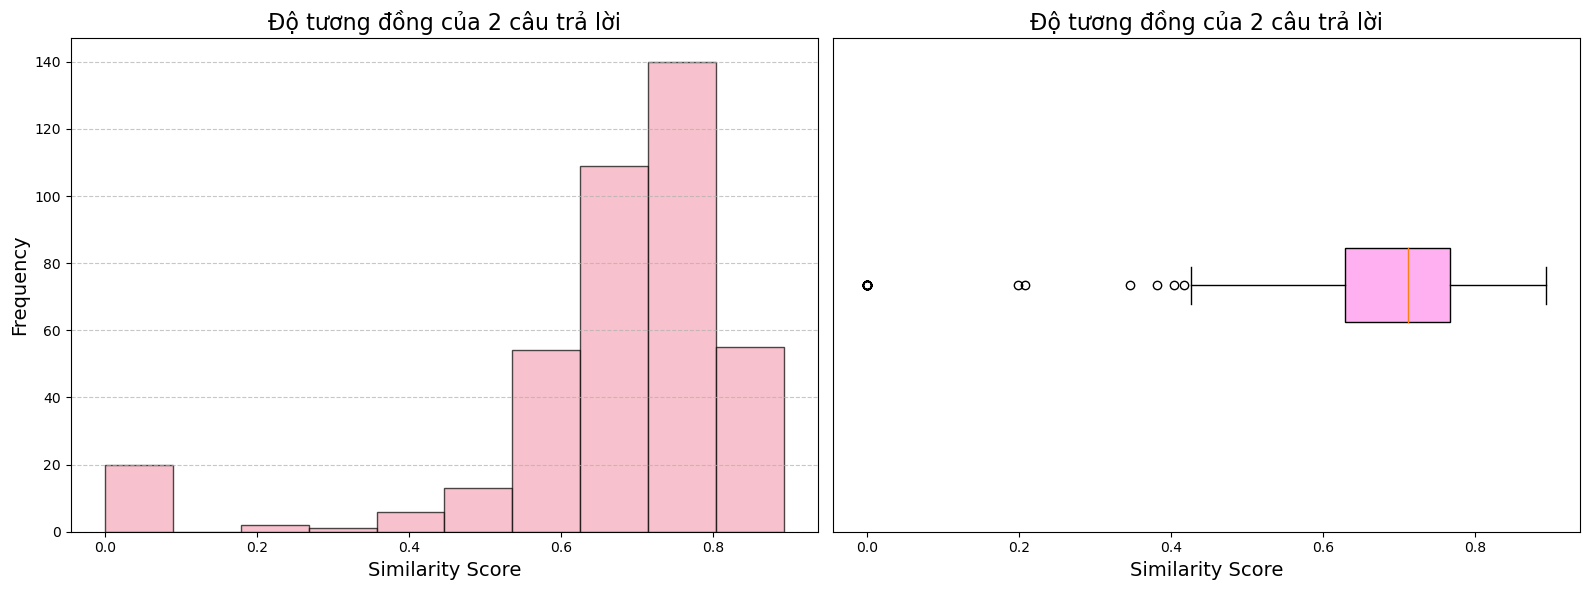

In [56]:
plot_cosine_similarity(df, 'similarity_gpt_non_kb', 4)

## So sánh câu trả lời giữa chuyên gia với với Gemini mà không cung cấp knowledge base

In [57]:
df['similarity_gemini_non_kb'] = df.apply(lambda row: calculate_similarity(row, col1="content", col2="gemini_non_kb"), axis=1)


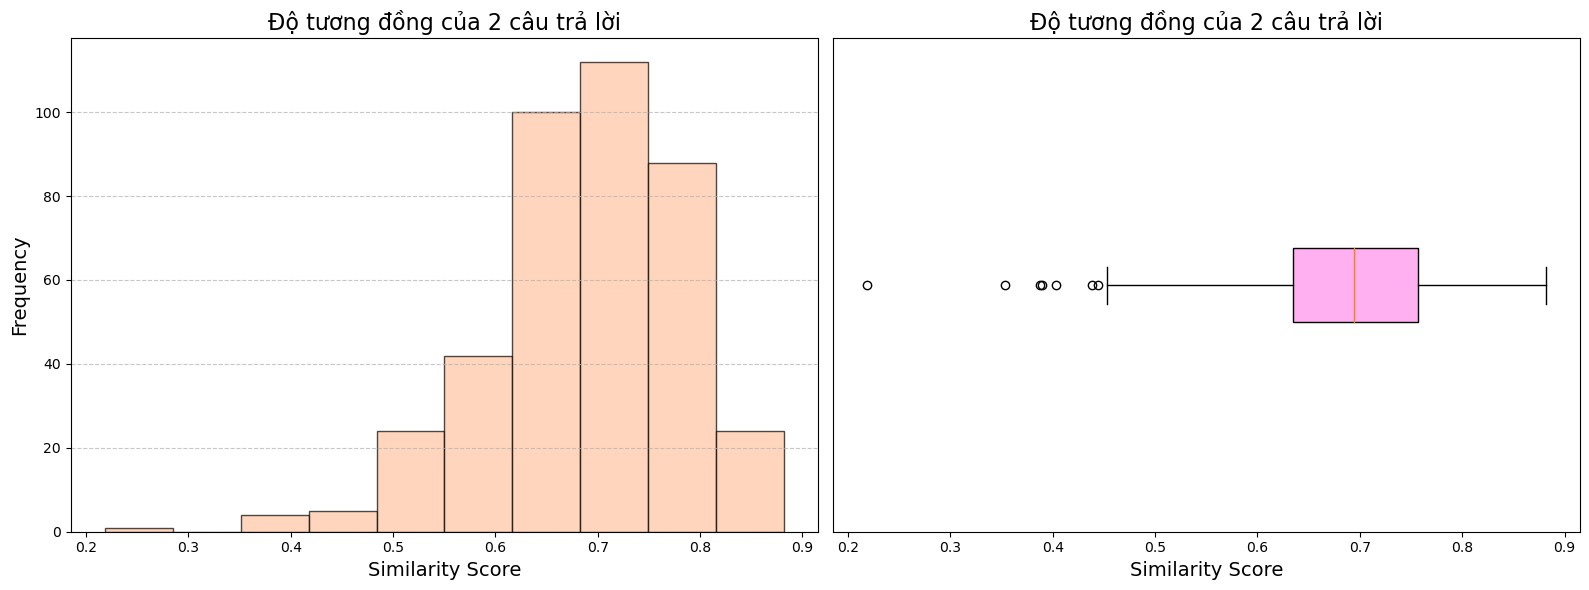

In [58]:
plot_cosine_similarity(df, 'similarity_gemini_non_kb', 5)

## 3. Đánh giá thủ công câu trả của iLaw với câu trả lời của chuyên gia từ Thư viện Pháp luật

- Quy tắc chấm điểm:

    0. Không đủ căn cứ để so sánh ( do câu hỏi, câu trả lời từ chuyên gia ngắn)
    1. Khác nhau hoàn toàn (câu trả lời iLaw không có nội dung, nội dung 2 câu khác nhau hoàn toàn) 0-20%
    2. Ít tương đồng (20-40%)
    3. Tương đối trung bình (40-60%)
    4. Tương đồng cao (60-80%)
    5. Giống nhau ( câu trả lời có cùng ý nghĩa, trích dẫn đúng luật) 80-100%

In [59]:
valid_df = pd.read_csv('valid_answer_with_score.csv')

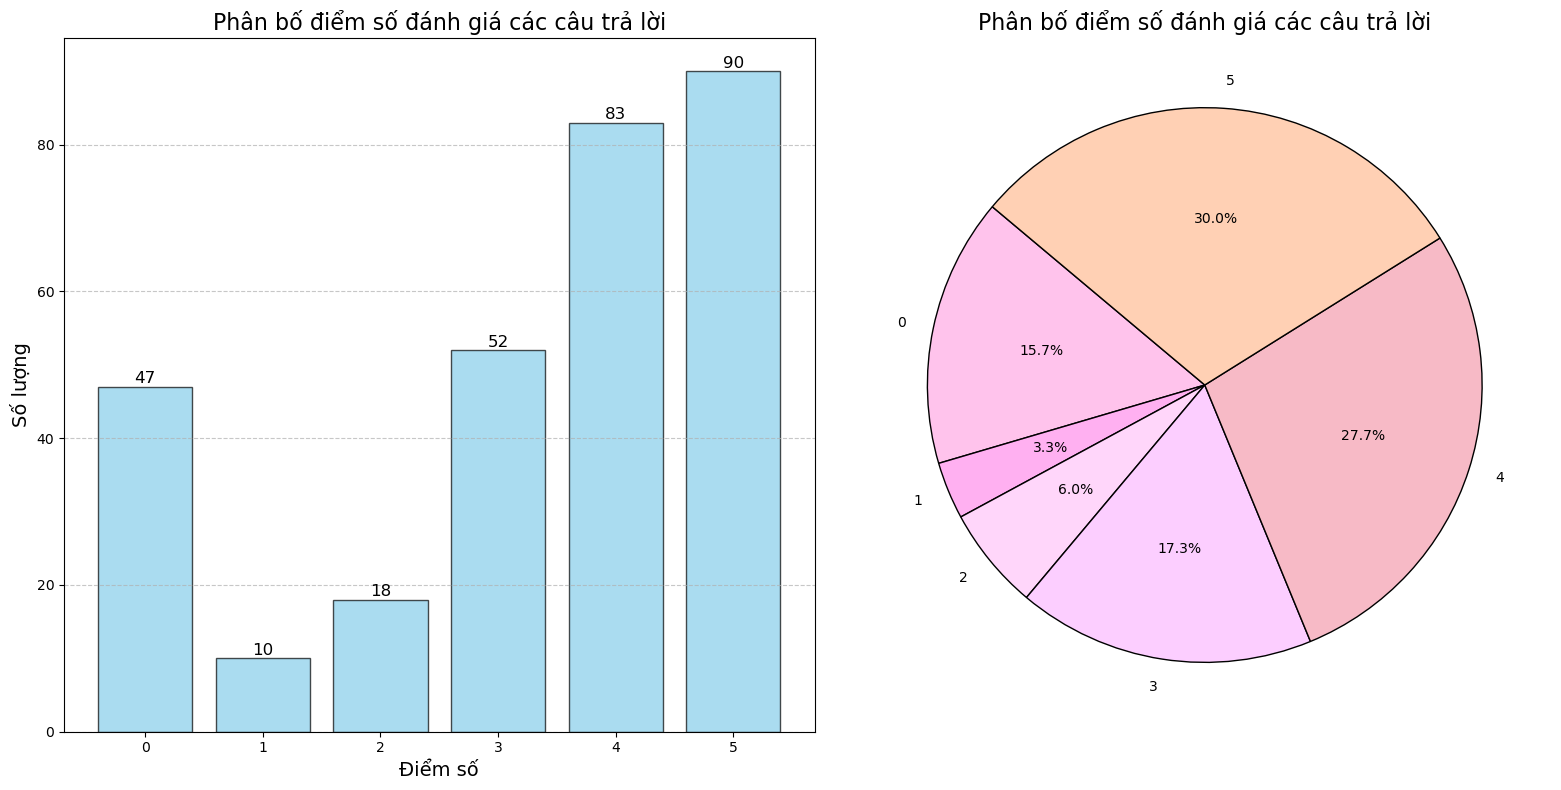

In [60]:

score_counts = valid_df['score'].value_counts().sort_index()
for i in range(0, 6):
    if i not in score_counts.index:
        score_counts[i] = 0
score_counts = score_counts.sort_index()

# Tạo bảng màu pastel
pastel_colors = [to_rgba(c, alpha=0.8) for c in ['#FFB5E8', '#FF9CEE', '#FFCCF9', '#FCC2FF', '#F5A9B8', '#FFC5A1']]

# Khởi tạo figure và subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Vẽ biểu đồ cột
axes[0].bar(score_counts.index, score_counts.values, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Phân bố điểm số đánh giá các câu trả lời', fontsize=16)
axes[0].set_xlabel('Điểm số', fontsize=14)
axes[0].set_ylabel('Số lượng', fontsize=14)
axes[0].set_xticks(score_counts.index)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Thêm số lượng lên trên các cột
for index, value in enumerate(score_counts.values):
    axes[0].text(index, value + 0.5, str(value), ha='center', fontsize=12)

# Vẽ biểu đồ tròn
axes[1].pie(
    score_counts, 
    labels=score_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=pastel_colors, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
axes[1].set_title('Phân bố điểm số đánh giá các câu trả lời', fontsize=16)

# Tăng khoảng cách giữa các subplot
plt.tight_layout()
plt.show()
